## NOISE CLEARING, EDGE AND CORNER DETECTION

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
from skimage.util import random_noise

In [2]:
def plot_image(image_1, image_2, title_1="Original", title_2="Customized"):
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

def plot_image3(image_1, image_2,image_3, title_1="Original", title_2="Canny 1", title_3="Canny 2"):
    plt.figure(figsize=(20,20))
    plt.subplot(1, 3, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 3, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.subplot(1, 3, 3)
    plt.imshow(image_3,cmap="gray")
    plt.title(title_3)
    plt.show()

In [3]:
palace = io.imread("https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2014/10/29/1414599095622/f633d990-dff1-4609-bfb4-677f8d4e562b-2060x1236.jpeg?width=1900&quality=85&auto=format&fit=max&s=e6d8510af717e5b86c869a47485814c2")

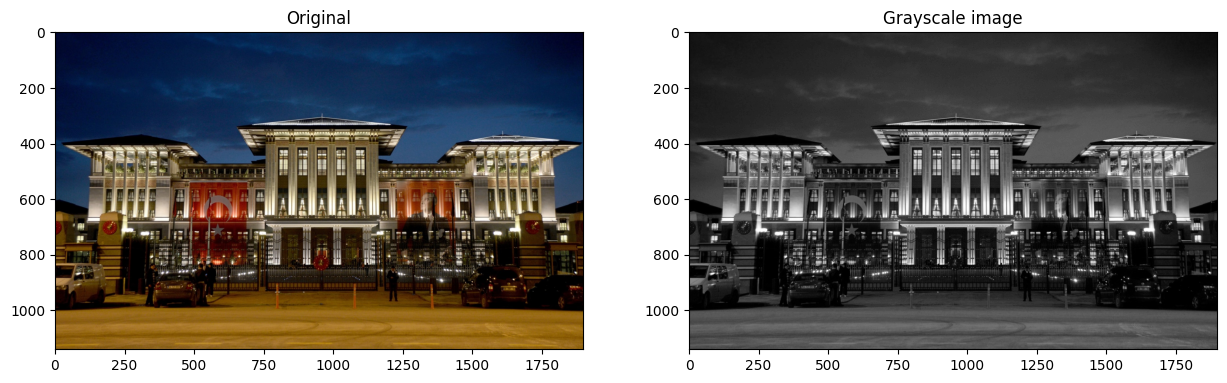

In [4]:
palace_gray = cv2.cvtColor(palace,cv2.COLOR_BGR2GRAY)
plot_image(palace,palace_gray,title_2="Grayscale image")


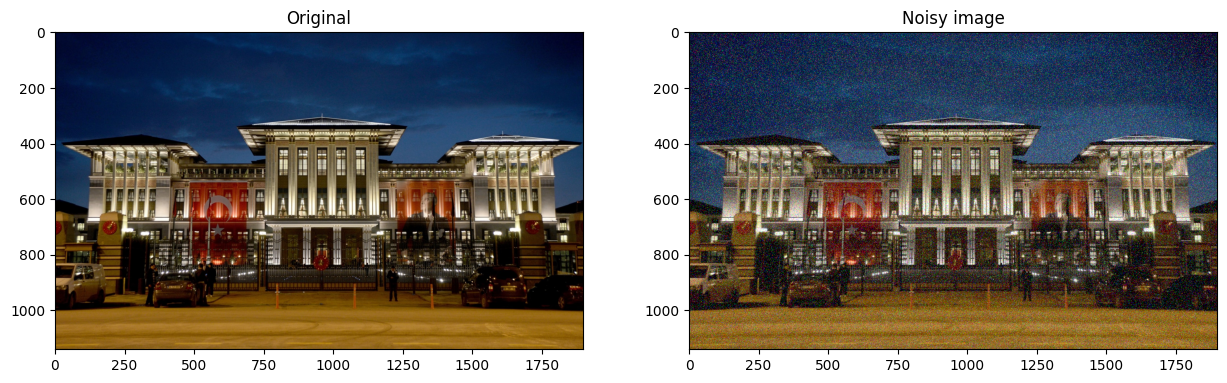

In [5]:
noise = random_noise(palace, mode='s&p', amount=0.15)
noise = np.array(255 * noise, dtype=np.uint8)
plot_image(palace,noise,title_2="Noisy image")

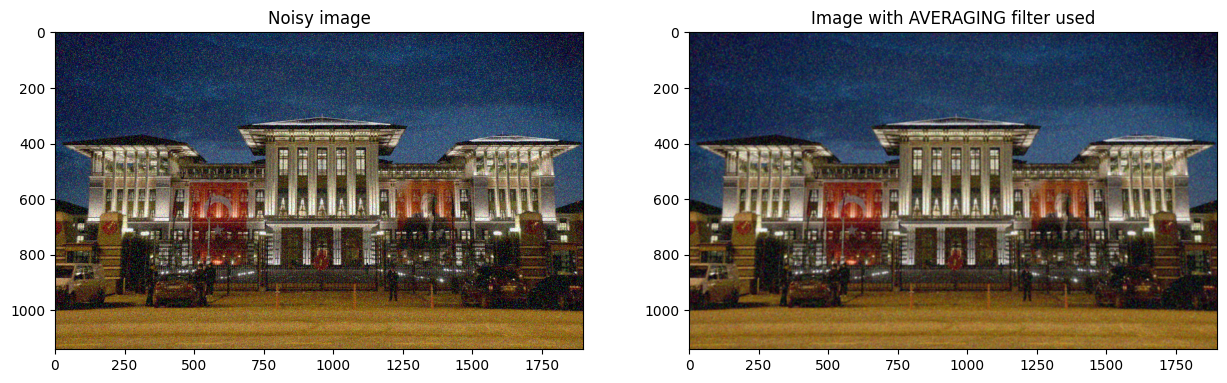

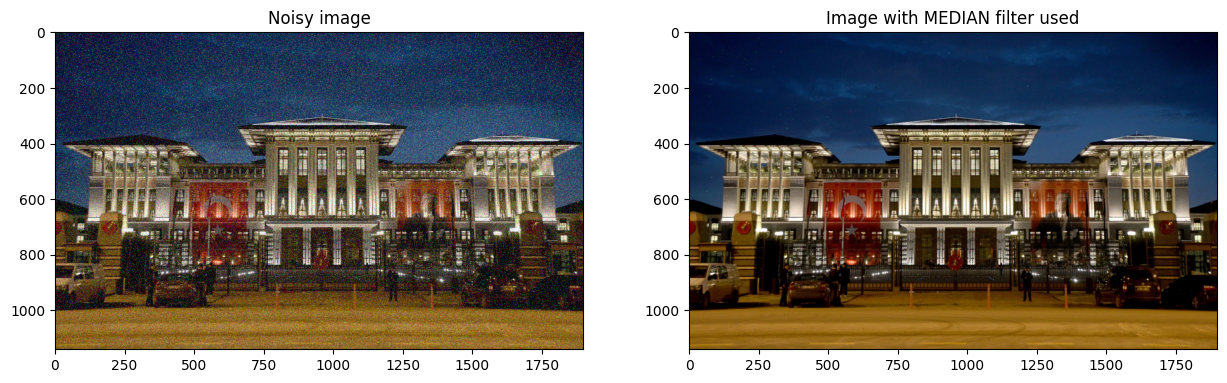

In [6]:
average_kernel = np.ones((5,5))/25
average_customized= cv2.filter2D(src=noise, ddepth=-1, kernel=average_kernel)
plot_image(noise,average_customized,title_1="Noisy image",title_2="Image with AVERAGING filter used")

median_customized = cv2.medianBlur(noise,3)
plot_image(noise,median_customized,title_1="Noisy image",title_2="Image with MEDIAN filter used")

If there is an absurd number of noise where the average filter is, it will affect that pixel anyway. Using the average filter in salt pepper noise could be a wrong choice. As the noise probe ratio of the picture is 15% in the median filter, the probability of getting a noise pixel with a median of 9 digits in a filter is very low. The median filter will be more effective for resolving salt pepper noise.

In [7]:
def calculate(array1,filter):#2x2  
    sayı=array1[0]*filter[0][0]+array1[1]*filter[0][1]+array1[2]*filter[1][0]+array1[3]*filter[1][1]
    return sayı


In [8]:
def matrix_roaming(image,filter):
    filtered_image=image.copy()
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            filtered_image[i][j]=calculate(np.array([image[i-1][j-1],image[i-1][j],image[i][j-1],image[i][j]]),filter)
    return filtered_image        
    


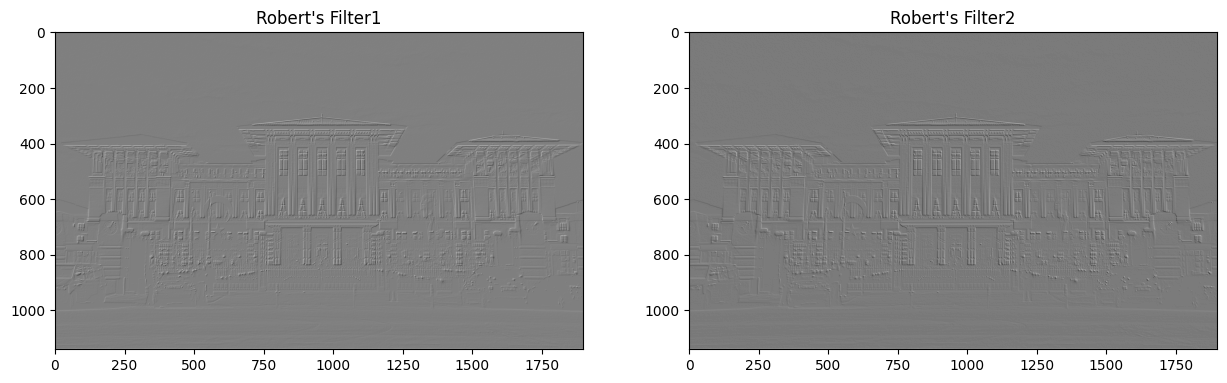

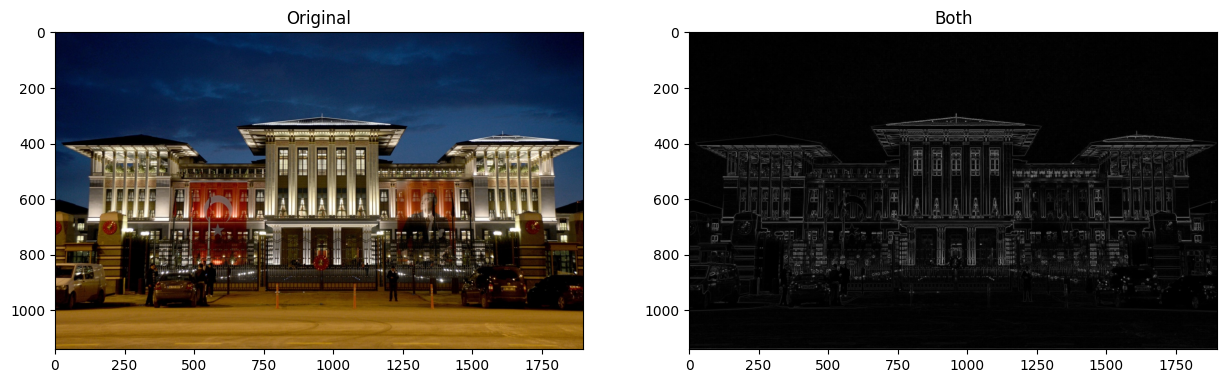

In [9]:
#it takes a while to get around
robert_filter1=np.array([[-1,0],[0,1]]) 
robert_filter2=np.array([[0,-1],[1,0]])

filtered_image1=matrix_roaming(palace_gray.astype('float64'),robert_filter1)
filtered_image2=matrix_roaming(palace_gray.astype('float64'),robert_filter2)

plot_image(filtered_image1,filtered_image2,title_1="Robert's Filter1",title_2="Robert's Filter2")
son = np.sqrt(np.square(filtered_image1)+np.square(filtered_image2))

plot_image(palace,son,title_2="Both")


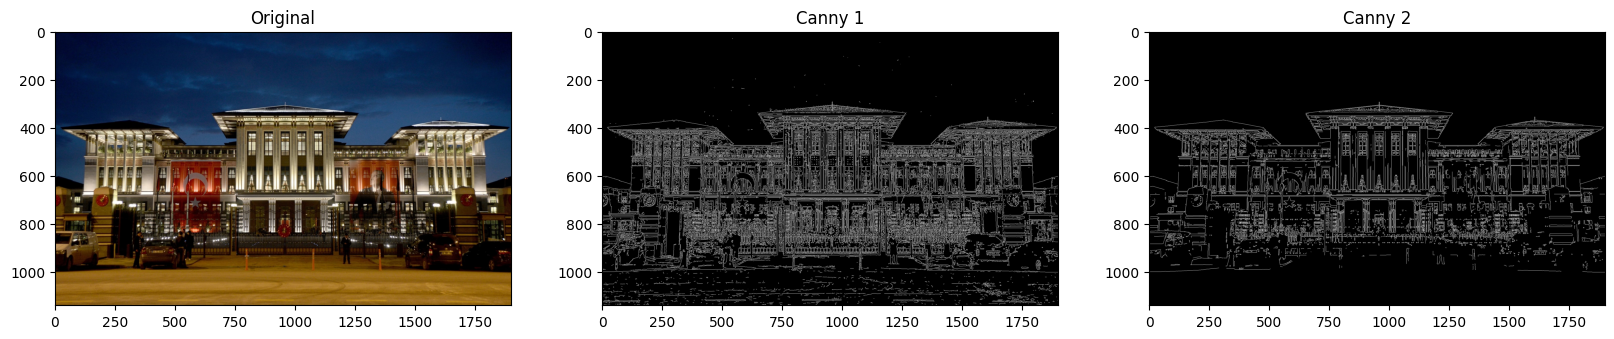

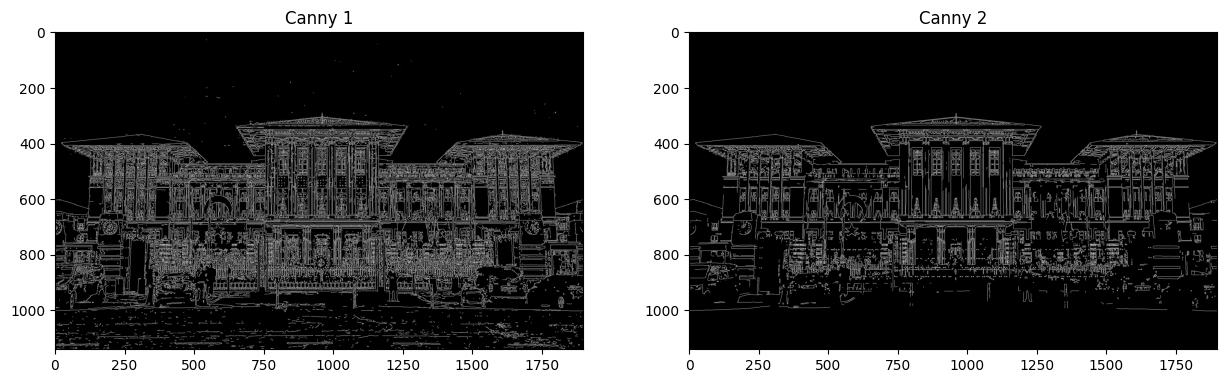

In [10]:
canny1=cv2.Canny(palace,50,70)
canny2=cv2.Canny(palace,150,200)
plot_image3(palace,canny1,canny2)
plot_image(canny1,canny2,title_1="Canny 1",title_2="Canny 2")

Values below the lower value in the threshold set do not show edges. Displays all edges above the upper value in the threshold set. If the values in between intersect with the upper value, it also shows those edges. In order not to see the edges in the detail in the output, the threshold set lower value should not be selected too low. The condition for selecting the upper value also varies from image to image. If we make the threshold set values too high, we will not get any corners. So I chose the range that looks best to me.